# Bibliotecas

In [1]:
!pip install plotpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.0 MB 9.4 MB/s 
     |████████████████████████████████| 730 kB 49.1 MB/s 
     |████████████████████████████████| 2.8 MB 44.9 MB/s 
  Created wheel for plotpy: filename=plotpy-1.2.0-cp37-cp37m-linux_x86_64.whl size=7386410 sha256=6b3f10e8a78605d063cc2b11467cec4b3fd1ef02c04bc202f835fc98b6a7a021
  Stored in directory: /root/.cache/pip/wheels/cd/40/2a/df0b684e5f9309e48061909617ab9518787b5d87a6deb94e08
Successfully built plotpy
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires h5py>=2.9.0, but you have h5py 2.8.0 which is incompatible.


In [2]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
sns.set_theme(style="darkgrid")
palette="Set3"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Conexão com base de dados Census e estudo inicial

In [6]:
base_census = pd.read_csv('/content/drive/MyDrive/Python Machine Learning/Arquivos/Bases de dados/census.csv')

In [7]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
# Caracteristicas da base
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Medias
base_census.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age                  38.581647
final-weight     189778.366512
education-num        10.080679
capital-gain       1077.648844
capital-loos         87.303830
hour-per-week        40.437456
dtype: float64

In [10]:
# Verificar nulos
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [11]:
# Verificar a quantidade de registros das classses
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [12]:
df = pd.DataFrame(base_census)
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

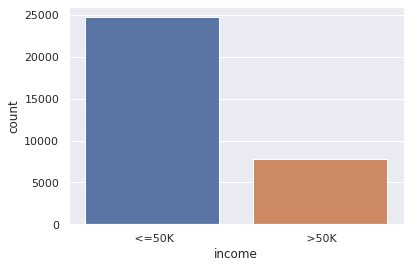

In [13]:
# Estudando gráfico da classe
sns.countplot(x = base_census['income']);

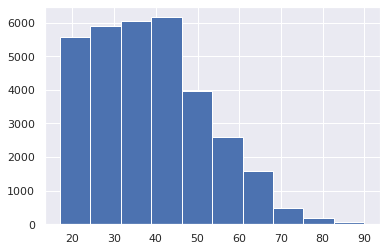

In [14]:
plt.hist(base_census['age']);

In [15]:
threegraph = px.treemap(base_census, path = ['education', 'age'])
threegraph.show()

In [16]:
grafico = px.treemap(base_census, path = ['workclass', 'age'])
grafico.show() 

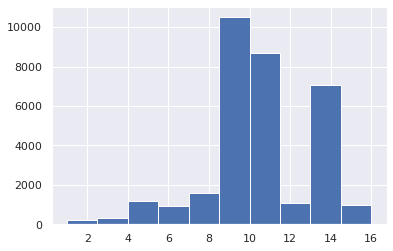

In [17]:
plt.hist(base_census['education-num']);

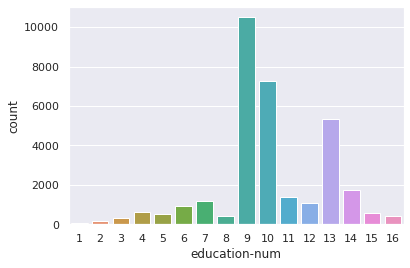

In [18]:
sns.countplot(x = base_census['education-num']);

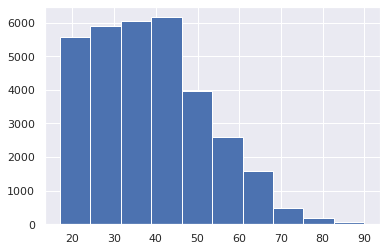

In [19]:
plt.hist(base_census['age']);

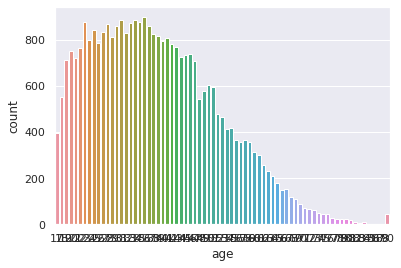

In [20]:
sns.countplot(x = base_census['age']);

In [21]:
grafico = px.parallel_categories(base_census, dimensions = ['education', 'relationship'])
grafico.show()

In [22]:
grafico = px.parallel_categories(base_census, dimensions = ['occupation', 'relationship'])
grafico.show()

# Divisão de Previsores e Classe

In [23]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
# Previsores
X_census = base_census.iloc[:,0:14].values 

In [25]:
X_census[0]


array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [26]:
# Classe
Y_census = base_census.iloc[:,14].values

In [27]:
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Tratamento de Atributos Categóricos

**Label Encoder**

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [30]:
# Tratamento inicial

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_coutry = LabelEncoder()

In [31]:
# Indexação do Label Encoder

X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,3])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_coutry.fit_transform(X_census[:,13])

In [32]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

# One Hot Encoder

In [33]:
len(np.unique(base_census['workclass']))
len(np.unique(base_census['occupation']))

15

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
onehotencoder_census = ColumnTransformer(transformers= [('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder = 'passthrough')

In [36]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [37]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [38]:
X_census.shape

(32561, 109)

In [39]:
Y_census.shape

(32561,)

# Escalonamento de Valores

In [40]:
# Vamos deixar os atributos com o mesmo formato para melhorar o algoritmo

from sklearn.preprocessing import StandardScaler

In [41]:
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [42]:
# Agora temos valores no mesmo escalonamento
# Os negativos não são um problema

X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.17175325, -0.19348662, -0.11609195,
       -0.07201601, -0.10164955, -0.1422718 , -0.12664495, -0.18406376,
       -0.21053433,  2.25399324, -0.11334387, -0.68994199, -0.23637391,
       -0.03960742, -0.13419553, -0.53714425, -0.82533335,  1.70899099,
       -0.17624972, -0.42934582, -0.34403232, -0.22492681, -0.09820087,
       -0.18155194, -0.32576824, -0.09161163,  0.4130197 , -0.70307135,
        0.70307135, -0.13502327, -0.02416321, -0.06107342, -0.0480488 ,
       -0.04260602, -0.05409379, -0.04641598, -0.02933708, -0.05

# Divisão da base em treinamento e teste

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Vamos criar 4 novas variáveis
# 75% da base

X_census_treinamento, X_census_teste, Y_census_treinamento, Y_census_teste = train_test_split(X_census, Y_census, test_size = 0.15, random_state = 0)

In [45]:
# Registros que serão enviados para aprendizagem do algoritmo

X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 109), (27676,))

In [46]:
X_census_teste.shape, Y_census_teste.shape

((4885, 109), (4885,))

# Salvando as variáveis

In [47]:
# Vamos utilizar o pickle para salvar os arquivos em disco

import pickle

In [48]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste], f)

In [49]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [50]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 109), (27676,))

In [51]:
X_census_teste.shape, Y_census_teste.shape

((4885, 109), (4885,))

# Naive Bayes 47.67%

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, Y_census_treinamento)

GaussianNB()

In [54]:
# Previsões geradas

previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [55]:
# Comparação

Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
# Taxa de acerto
# 41%
# Por ter apenas 2 categorias de classe é como se estivessemos jogando cara ou coroa
# Outros algoritmos serão utilizados
# Ponto importante, caso não for utilizado o #ESCALONAMENTO# teremos melhores resultados

accuracy_score(Y_census_teste, previsoes)

0.4174002047082907

In [58]:
from yellowbrick.classifier import ConfusionMatrix

0.4174002047082907

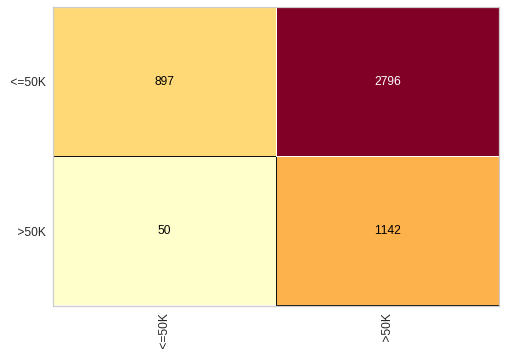

In [59]:
# Matrix de confusão

cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [60]:
# Classification Report

print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.95      0.24      0.39      3693
        >50K       0.29      0.96      0.45      1192

    accuracy                           0.42      4885
   macro avg       0.62      0.60      0.42      4885
weighted avg       0.79      0.42      0.40      4885



# Árvore de Decisão 81.04%

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [63]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 109), (27676,))

In [64]:
X_census_teste.shape, Y_census_teste.shape

((4885, 109), (4885,))

In [65]:
arvore_census = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_census.fit(X_census_treinamento, Y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [66]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [67]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [68]:
arvore_census.feature_importances_

array([1.92718995e-03, 5.17794449e-03, 8.20901248e-03, 0.00000000e+00,
       1.02509183e-02, 5.83922834e-03, 7.43050993e-03, 3.74946458e-03,
       0.00000000e+00, 9.68060111e-05, 6.26972120e-04, 8.23872244e-05,
       0.00000000e+00, 4.09579089e-04, 7.97958691e-04, 3.05720777e-04,
       1.40340647e-03, 8.54287831e-04, 5.61460223e-04, 1.68251290e-04,
       3.65660528e-03, 2.76468502e-04, 0.00000000e+00, 2.16227185e-04,
       2.33198062e-03, 2.44150563e-03, 0.00000000e+00, 1.93208612e-01,
       6.51558946e-04, 2.72685304e-03, 2.07315815e-03, 1.40238660e-03,
       7.82317667e-05, 9.61928662e-05, 3.13883607e-04, 0.00000000e+00,
       6.94428504e-04, 2.24410716e-04, 9.09307081e-05, 1.65570671e-03,
       1.54763427e-03, 1.81867192e-03, 6.47899713e-04, 1.14366680e-03,
       5.50257960e-04, 1.25251936e-04, 6.21000541e-04, 1.63372058e-03,
       3.07433477e-03, 3.47060218e-03, 7.78654696e-04, 1.73441186e-03,
       1.22314921e-03, 4.55413245e-03, 2.31436709e-04, 2.17661399e-03,
      

In [69]:
arvore_census.classes_

array([' <=50K', ' >50K'], dtype=object)

In [70]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
# Gerando uma visualização para a árvore
# Geramos a lista de string para melhorar a visualização da árvore 
# Utilizaremos o matplotlib para geração de gráficos 

# from IPython.core.pylabtools import figsize

# from sklearn import tree
# previsores = ['age', 'workclass', 'final-weight', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
#               'capital-gain', 'capital-loos', 'hour-per-week', 'native-coutry']
# figura, eixos = plt.subplots(nrows = 1, ncols= 1, figsize = (20,20))
# tree.plot_tree(arvore_census, filled = True);

In [72]:
# Accuracy

accuracy_score(Y_census_teste, previsoes)

0.8124872057318321

0.8124872057318321

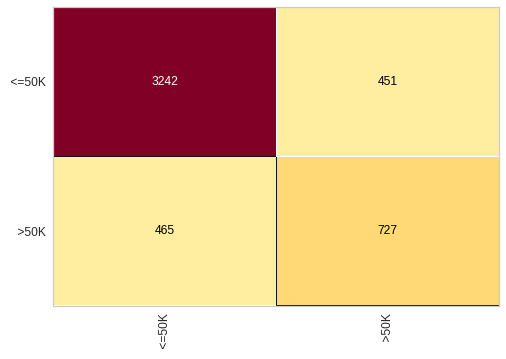

In [73]:
# Matrix de Confusão

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [74]:
# Classificação do Algoritmo

print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      3693
        >50K       0.62      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Random Forest 84.42%

In [75]:
# Importando Random Forest

from sklearn.ensemble import RandomForestClassifier 

In [76]:
# Leitura de arquivo

with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [77]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 109), (27676,))

In [78]:
X_census_teste.shape, Y_census_teste.shape

((4885, 109), (4885,))

In [79]:
# Por padrão é são criadas 100 árvores, vamos neste caso vamos utilizar 100
# O criterio utilizado nesse caso será entropia

random_forest_census = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_census.fit(X_census_treinamento, Y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [80]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [81]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [82]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_census_teste, previsoes)

0.844216990788127

0.844216990788127

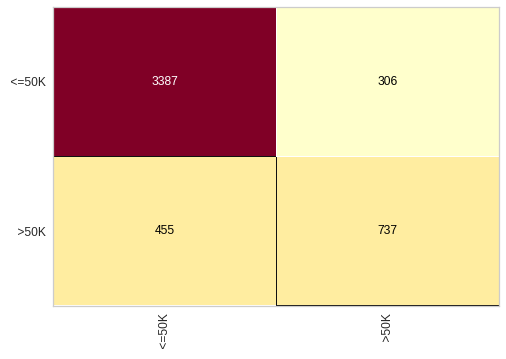

In [83]:
from yellowbrick.classifier import confusion_matrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste ,Y_census_teste)

In [84]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3693
        >50K       0.71      0.62      0.66      1192

    accuracy                           0.84      4885
   macro avg       0.79      0.77      0.78      4885
weighted avg       0.84      0.84      0.84      4885



# Classificador Base Majority Learner 75.91%

In [85]:
!pip install Orange3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.0 MB 1.8 MB/s 
     |████████████████████████████████| 149 kB 43.1 MB/s 
     |████████████████████████████████| 8.4 MB 32.0 MB/s 
     |████████████████████████████████| 2.5 MB 34.8 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 230 kB 68.6 MB/s 
     |████████████████████████████████| 492 kB 66.3 MB/s 
     |████████████████████████████████| 992 kB 71.2 MB/s 
     |████████████████████████████████| 332 kB 61.9 MB/s 
     |████████████████████████████████| 253 kB 56.5 MB/s 
     |████████████████████████████████| 1.1 MB 52.1 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 5

In [86]:
import Orange

In [87]:
base_census = Orange.data.Table('/content/drive/MyDrive/Python Machine Learning/Arquivos/Bases de dados/census_regras.csv')

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning:

The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.



In [88]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [89]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])
Orange.evaluation.CA(previsoes)

array([0.75919044])

In [90]:
from collections import Counter

In [91]:
Counter(str(registro.get_class()) for registro in base_census)


Counter({'<=50K': 24720, '>50K': 7841})

In [92]:
24720 / (24720 + 7841)

0.7591904425539756

# Aprendizagem Baseada em Instâncias 82.33%

In [93]:
# Importando o KNN

from sklearn.neighbors import KNeighborsClassifier

In [94]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [95]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 109), (27676,))

In [96]:
X_census_teste.shape, Y_census_teste.shape

((4885, 109), (4885,))

In [97]:
# Aplicando o treinamento. Obs: o KNN não treina em si, ele deixa os resultados salvos na memória.
# Foi utilizado o n_neighbors como 5 por ser um número base interessante.

knn_census = KNeighborsClassifier(n_neighbors = 10)
knn_census.fit(X_census_treinamento, Y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [98]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [99]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [100]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_census_teste, previsoes)

0.8233367451381781

0.8233367451381781

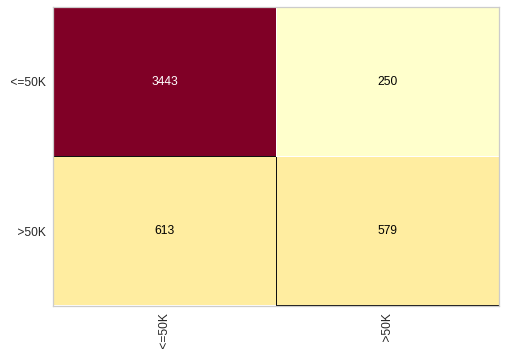

In [101]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste) 

In [102]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.85      0.93      0.89      3693
        >50K       0.70      0.49      0.57      1192

    accuracy                           0.82      4885
   macro avg       0.77      0.71      0.73      4885
weighted avg       0.81      0.82      0.81      4885



# Regrassão logística 84.00%

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [105]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 109), (27676,))

In [106]:
X_census_teste.shape, Y_census_teste.shape

((4885, 109), (4885,))

In [108]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(X_census_treinamento, Y_census_treinamento)

LogisticRegression(random_state=1)

In [109]:
logistic_census.intercept_

array([-2.02235712])

In [ ]:
logistic_census.coef_

In [111]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [112]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [113]:
accuracy_score(Y_census_teste, previsoes)

0.8462640736949847

0.8462640736949847

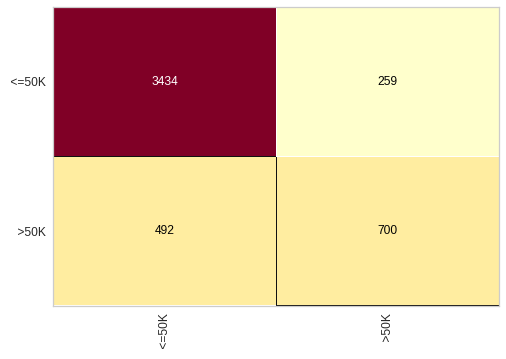

In [114]:
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)